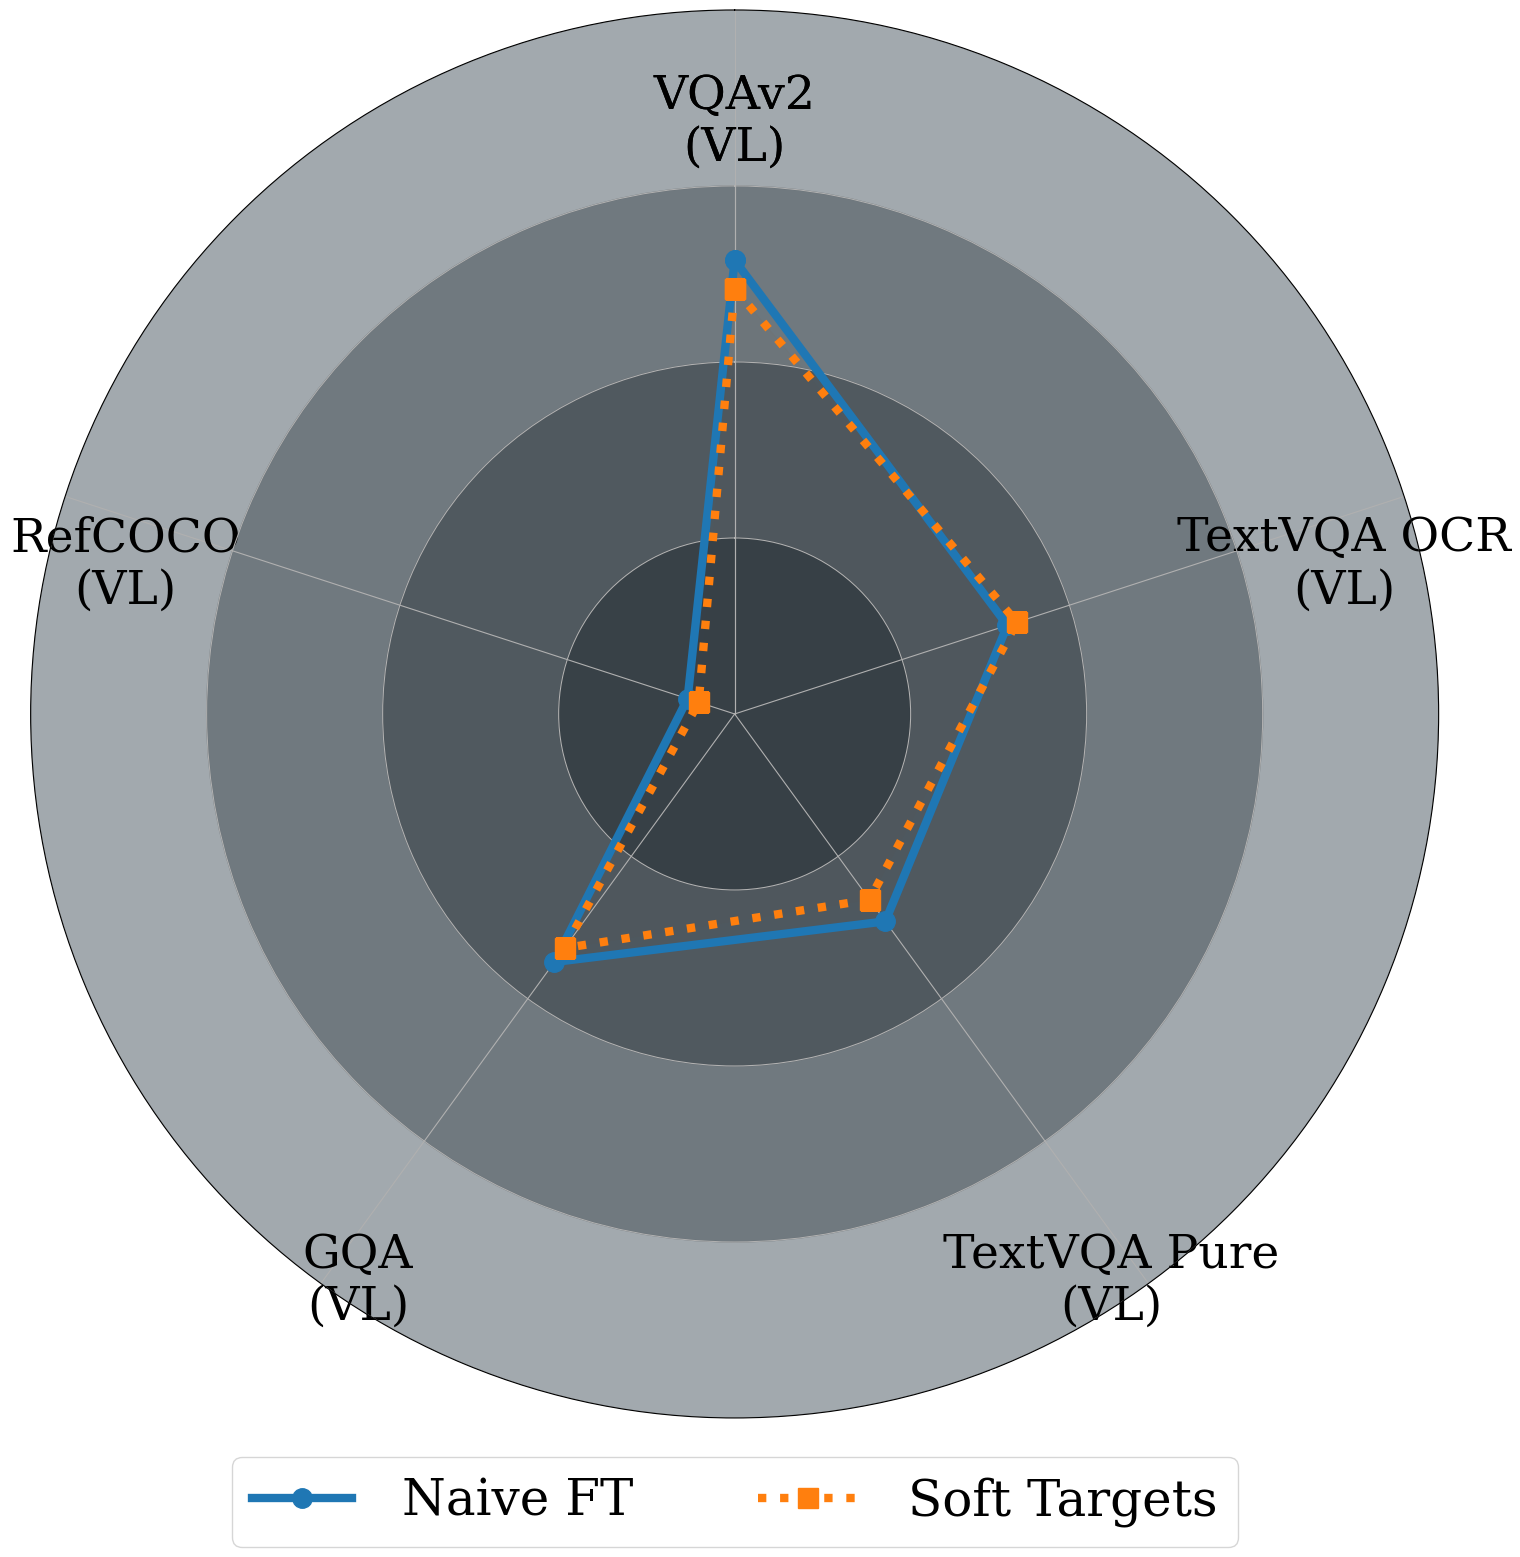

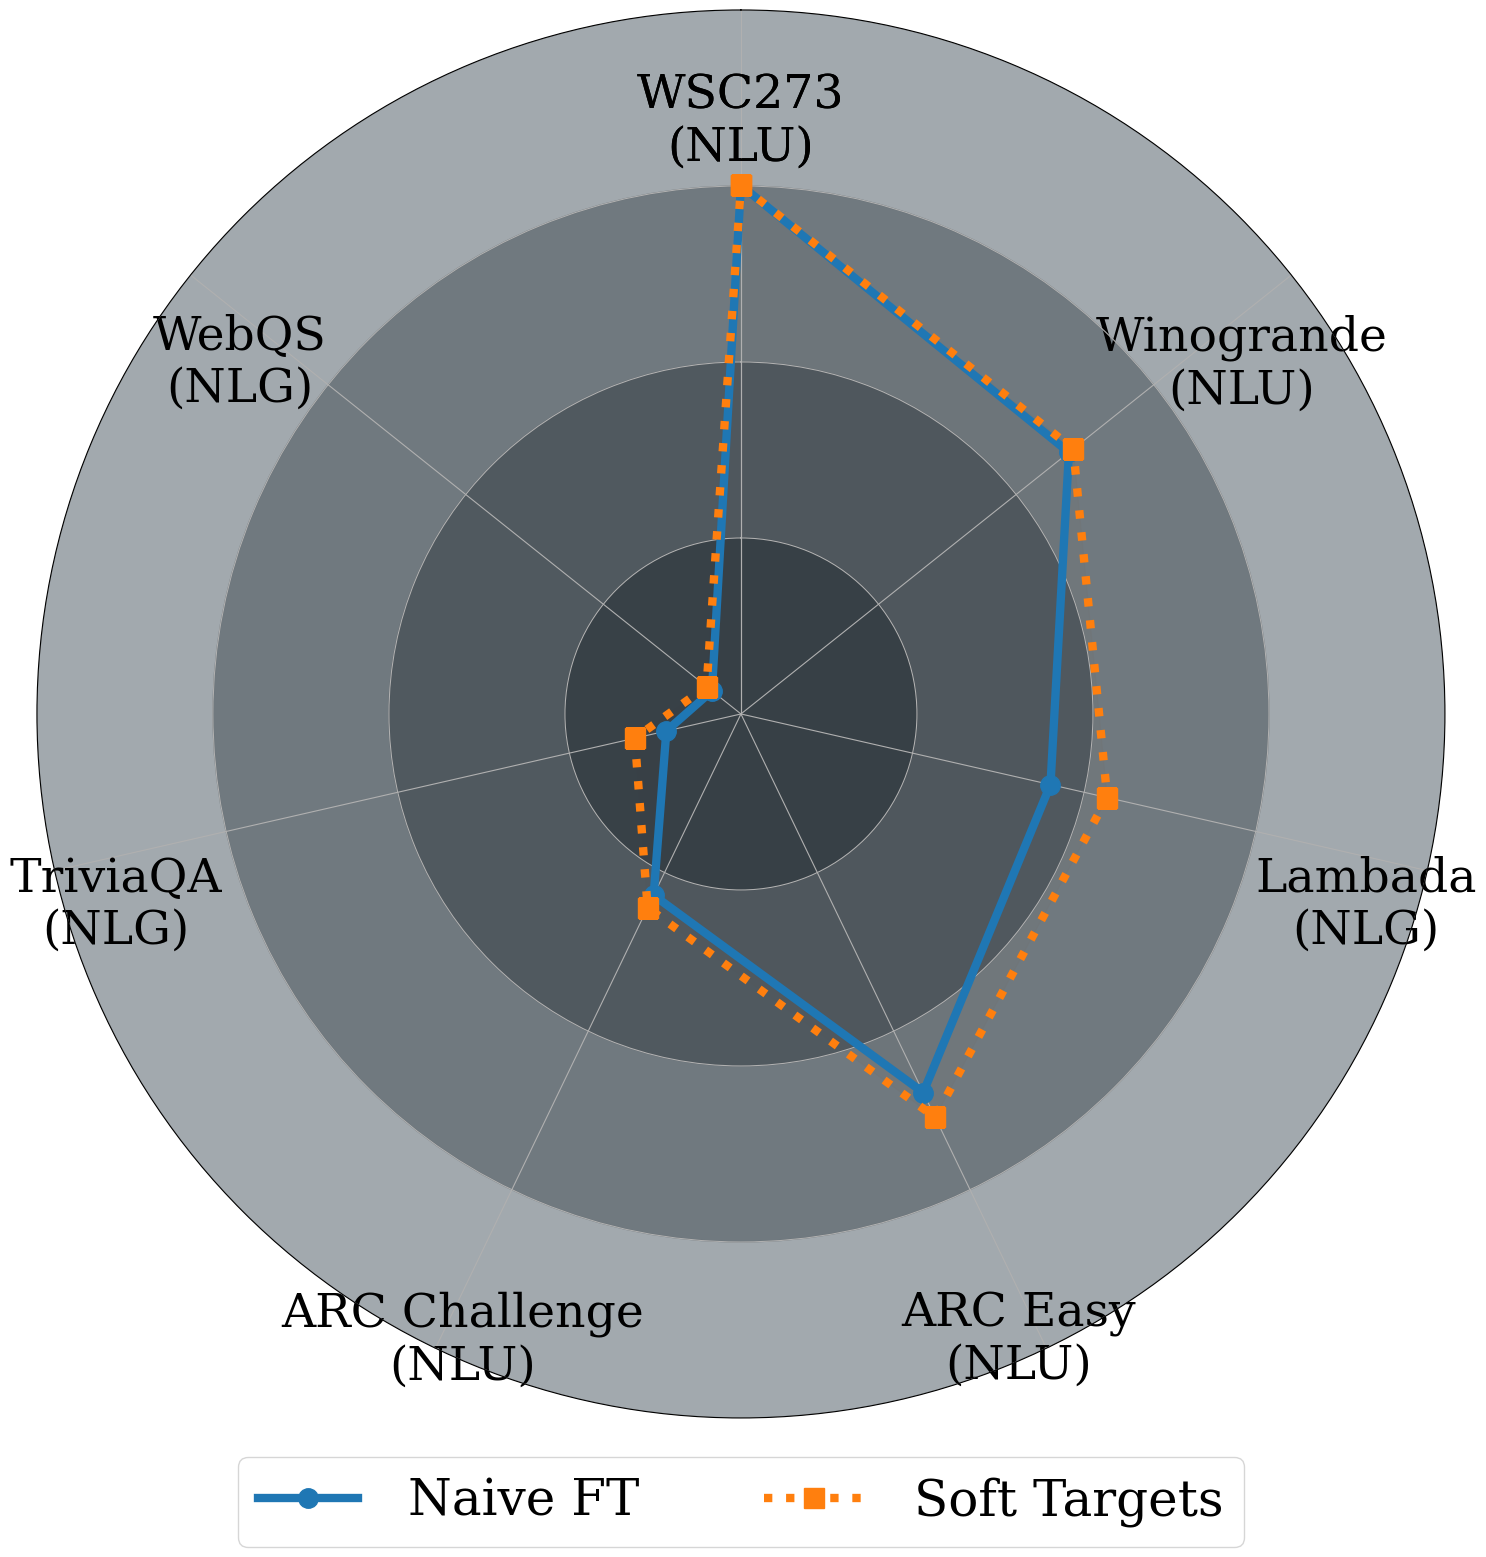

In [47]:
# Data for the two models, updated with TriviaQA and WebQS results
model_data = {
    "Naive FT": {
        "vqa-v2": 0.6445,
        "textvqa-ocr": 0.4073242187500003,
        "textvqa-pure": 0.3641601562500001,
        "gqa": 0.4355,
        "refcoco": 0.0703125,
        "wsc273": 0.7509157509157509,
        "winogrande": 0.595895816890292,
        "lambada_standard": 0.45099941781486513,
        "arc_easy": 0.5968013468013468,
        "arc_challenge": 0.2858361774744027,
        "triviaqa": 0.10867142220240748,
        "webqs": 0.05265748031496063
    },
    "Soft Targets": {
        "vqa-v2": 0.6041,
        "textvqa-ocr": 0.4213867187500004,
        "textvqa-pure": 0.3259765625000001,
        "gqa": 0.4111,
        "refcoco": 0.0537109375,
        "wsc273": 0.7509157509157509,
        "winogrande": 0.6037884767166535,
        "lambada_standard": 0.5336697069668155,
        "arc_easy": 0.6359427609427609,
        "arc_challenge": 0.3054607508532423,
        "triviaqa": 0.15464779313419527,
        "webqs": 0.0625
    }
}

# Custom labels with line breaks for better readability, updated for Non-VL plot
labels_vl = ['VQAv2\n(VL)', 'TextVQA OCR\n(VL)', 'TextVQA Pure\n(VL)', 'GQA\n(VL)', 'RefCOCO\n(VL)', 'VQAv2\n(VL)']
labels_non_vl = ['WSC273\n(NLU)', 'Winogrande\n(NLU)', 'Lambada\n(NLG)', 'ARC Easy\n(NLU)', 'ARC Challenge\n(NLU)', 'TriviaQA\n(NLG)', 'WebQS\n(NLG)', 'WSC273\n(NLU)']

# Prepare data for VL datasets
vl_model1_values = [model_data["Naive FT"][dataset] for dataset in ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa", "refcoco"]]
vl_model2_values = [model_data["Soft Targets"][dataset] for dataset in ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa", "refcoco"]]

# Prepare data for Non-VL datasets (updated with TriviaQA and WebQS)
non_vl_model1_values = [model_data["Naive FT"][dataset] for dataset in ["wsc273", "winogrande", "lambada_standard", "arc_easy", "arc_challenge", "triviaqa", "webqs"]]
non_vl_model2_values = [model_data["Soft Targets"][dataset] for dataset in ["wsc273", "winogrande", "lambada_standard", "arc_easy", "arc_challenge", "triviaqa", "webqs"]]

# Close the loop for the radar chart
vl_model1_values += vl_model1_values[:1]
vl_model2_values += vl_model2_values[:1]
non_vl_model1_values += non_vl_model1_values[:1]
non_vl_model2_values += non_vl_model2_values[:1]

BOTTOM_PADDING = 0.085  # Adjust the bottom padding as needed
TOP_PADDING = 0.965  # Adjust the top padding as needed
RIGHT_PADDING = 1.0  # Adjust the right padding as needed
LEFT_PADDING = 0.00  # Adjust the left padding as needed

# Function to create a professional radar chart with adjusted padding
def create_spider_chart(labels, model1_values, model2_values, model1_name, model2_name, title, filename):
    fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=dict(polar=True))
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(labels))
    
    # Radar lines
    linestyles = ["solid", "dotted"]
    markers = ["o", "s"]
    colors = ["#1f77b4", "#ff7f0e"]
    
    # Plot data for both models
    ax.plot(label_loc, model1_values, lw=6, ls=linestyles[0], marker=markers[0], markersize=14, label=model1_name, color=colors[0])
    ax.plot(label_loc, model2_values, lw=6, ls=linestyles[1], marker=markers[1], markersize=14, label=model2_name, color=colors[1])
    
    # Fill area
    ax.fill(label_loc, model1_values, color=colors[0], alpha=0.1)
    ax.fill(label_loc, model2_values, color=colors[1], alpha=0.1)
    
    # Customize the appearance of the chart
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    
    # Add labels with spacing and custom font size, rotating labels for better alignment
    lines, label_objects = plt.thetagrids(np.degrees(label_loc), labels=labels, fontsize=34, verticalalignment='top', rotation=45)
    
    # Move labels inward to fit inside the circle better
    for label_object in label_objects:
        label_object.set_position((label_object.get_position()[0], 0.15))

    ax.tick_params(pad=20)
    
    # Concentric circles
    thickness = 0.25
    circle_colors = ["#28313799", "#3b444b99", "#4f5a6199", "#65707899"]
    ax.set_rticks(np.linspace(thickness, 1.0, len(circle_colors)))
    ax.set_yticklabels([])
    for ix in range(len(circle_colors), 0, -1):
        circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=circle_colors[ix - 1])
        ax.add_artist(circ)
    
    # Increase font size for readability
    plt.rc('font', family='serif', size=28)
    plt.rc('axes', titlesize=36)
    plt.rc('legend', fontsize=36)
    
    # Add title and legend with a bounding box around the legend
    plt.title(title, size=36, color='black', y=1.1)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=2, frameon=True, handletextpad=1, columnspacing=2.5, fancybox=True)
    
    # Adjust layout for tightness and padding
    plt.tight_layout()
    plt.subplots_adjust(bottom=BOTTOM_PADDING, top=TOP_PADDING, right=RIGHT_PADDING, left=LEFT_PADDING)
    
    # Save the plot as PNG for high quality
    plt.savefig(filename, format='png', dpi=300)
    plt.show()

# Create VL spider chart with adjusted padding
create_spider_chart(
    labels_vl, 
    vl_model1_values, 
    vl_model2_values, 
    "Naive FT", 
    "Soft Targets", 
    None, 
    "compare_2p8b_vl.png"
)

# Create Non-VL spider chart with updated labels and adjusted padding
create_spider_chart(
    labels_non_vl, 
    non_vl_model1_values, 
    non_vl_model2_values, 
    "Naive FT", 
    "Soft Targets", 
    None, 
    "compare_2p8b_non_vl.png"
)